In [50]:
import pandas as pd
path = "E:/Coffee-Analysis/data/"

coffee = pd.read_csv(path + "coffee log.csv")
math = pd.read_csv(path + "math test.csv")
reaction = pd.read_csv(path + "reaction test.csv")

coffee.head(), math.head(), reaction.head()

(           Submission Time        Date  \
 0   Nov 21, 2025 @ 8:46 PM  2025-11-21   
 1   Nov 17, 2025 @ 8:29 AM  2025-11-17   
 2   Nov 16, 2025 @ 8:01 PM  2025-11-16   
 3   Nov 15, 2025 @ 3:11 PM  2025-11-15   
 4  Nov 13, 2025 @ 11:36 AM  2025-11-13   
 
   Time (When did you take your caffeine?)  Amount of Caffeine/mg  \
 0                                10:10 am                    150   
 1                                08:29 am                     80   
 2                                07:00 pm                    130   
 3                                03:10 pm                    130   
 4                                10:00 am                    180   
 
    From which SOURCE did you take the caffeine?  
 0                                             3  
 1                                             1  
 2                                             2  
 3                                             2  
 4                                             2  ,
    id  user_id  

In [51]:
#replacing the time. because there was a different time format in the data
time_col = "Time (When did you take your caffeine?)"
coffee[time_col] = coffee[time_col].replace("12:00 am", "12:00 pm")

#defining one specific column for all the data
coffee["coffee_date_time"] = pd.to_datetime(coffee["Date"] + " " + coffee[time_col], format="%Y-%m-%d %I:%M %p")


math["test_date_time"] = pd.to_datetime(math["start_time_full"])


reaction["test_date_time"] = pd.to_datetime(reaction["created_at"])


coffee = coffee.sort_values("coffee_date_time")
coffee = coffee.reset_index(drop=True)
math = math.sort_values("test_date_time")
math = math.reset_index(drop=True)
reaction = reaction.sort_values("test_date_time")
reaction = reaction.reset_index(drop=True)


coffee.head()

,Submission Time,Date,Time (When did you take your caffeine?),Amount of Caffeine/mg,From which SOURCE did you take the caffeine?,coffee_date_time
0,"Nov 7, 2025 @ 9:25 PM",2025-10-29,10:00 am,130,1,2025-10-29 10:00:00
1,"Nov 7, 2025 @ 9:26 PM",2025-10-30,11:00 am,80,3,2025-10-30 11:00:00
2,"Nov 7, 2025 @ 9:26 PM",2025-10-31,12:00 pm,130,1,2025-10-31 12:00:00
3,"Nov 7, 2025 @ 9:27 PM",2025-11-01,02:00 pm,130,1,2025-11-01 14:00:00
4,"Nov 7, 2025 @ 9:27 PM",2025-11-03,12:00 pm,80,3,2025-11-03 12:00:00


In [52]:
coffee = coffee.drop(columns=["Submission Time", "From which SOURCE did you take the caffeine?"], errors="ignore")
coffee.head()

,Date,Time (When did you take your caffeine?),Amount of Caffeine/mg,coffee_date_time
0,2025-10-29,10:00 am,130,2025-10-29 10:00:00
1,2025-10-30,11:00 am,80,2025-10-30 11:00:00
2,2025-10-31,12:00 pm,130,2025-10-31 12:00:00
3,2025-11-01,02:00 pm,130,2025-11-01 14:00:00
4,2025-11-03,12:00 pm,80,2025-11-03 12:00:00


In [53]:
math.head()

,id,user_id,exam_id,start_time_full,end_time_full,response_time_seconds,points,percent_correct,test_date_time
0,33,0,2,2025-11-08 16:22:32,2025-11-08 16:23:00,28,4,80,2025-11-08 16:22:32
1,34,0,5,2025-11-08 18:31:33,2025-11-08 18:32:09,36,4,80,2025-11-08 18:31:33
2,35,0,8,2025-11-09 17:43:38,2025-11-09 17:44:38,60,5,100,2025-11-09 17:43:38
3,36,0,10,2025-11-09 19:54:23,2025-11-09 19:54:58,35,1,20,2025-11-09 19:54:23
4,37,0,12,2025-11-10 08:22:26,2025-11-10 08:23:24,58,2,40,2025-11-10 08:22:26


In [54]:
math = math.drop(columns=["id", "user_id", "exam_id", "start_time_full", "end_time_full"], errors = "ignore")
math.head()

,response_time_seconds,points,percent_correct,test_date_time
0,28,4,80,2025-11-08 16:22:32
1,36,4,80,2025-11-08 18:31:33
2,60,5,100,2025-11-09 17:43:38
3,35,1,20,2025-11-09 19:54:23
4,58,2,40,2025-11-10 08:22:26


In [55]:
print(reaction)

    id  user_id  reaction_time           created_at      test_date_time
0   22      NaN            380  2025-11-08 16:23:07 2025-11-08 16:23:07
1   23      NaN            436  2025-11-08 18:32:16 2025-11-08 18:32:16
2   24      NaN            351  2025-11-09 17:44:43 2025-11-09 17:44:43
3   25      NaN            357  2025-11-09 19:55:03 2025-11-09 19:55:03
4   26      NaN            525  2025-11-10 08:23:30 2025-11-10 08:23:30
5   27      NaN            373  2025-11-10 10:04:49 2025-11-10 10:04:49
6   28      NaN            708  2025-11-10 14:46:39 2025-11-10 14:46:39
7   29      NaN            488  2025-11-10 14:49:57 2025-11-10 14:49:57
8   30      NaN            383  2025-11-10 15:35:44 2025-11-10 15:35:44
9   31      NaN            381  2025-11-12 11:40:29 2025-11-12 11:40:29
10  32      NaN            360  2025-11-12 13:52:54 2025-11-12 13:52:54


In [56]:
reaction = reaction.drop(columns=["id", "user_id", "created_at"], errors="ignore")
reaction = reaction.rename(columns={"reaction_time": "reaction_time_ms"})

print(reaction)

    reaction_time_ms      test_date_time
0                380 2025-11-08 16:23:07
1                436 2025-11-08 18:32:16
2                351 2025-11-09 17:44:43
3                357 2025-11-09 19:55:03
4                525 2025-11-10 08:23:30
5                373 2025-11-10 10:04:49
6                708 2025-11-10 14:46:39
7                488 2025-11-10 14:49:57
8                383 2025-11-10 15:35:44
9                381 2025-11-12 11:40:29
10               360 2025-11-12 13:52:54


In [57]:
#there is more than one reaction test before the second coffee time on day 10
reaction = reaction.drop(index=7).reset_index(drop=True)
print(reaction)

   reaction_time_ms      test_date_time
0               380 2025-11-08 16:23:07
1               436 2025-11-08 18:32:16
2               351 2025-11-09 17:44:43
3               357 2025-11-09 19:55:03
4               525 2025-11-10 08:23:30
5               373 2025-11-10 10:04:49
6               708 2025-11-10 14:46:39
7               383 2025-11-10 15:35:44
8               381 2025-11-12 11:40:29
9               360 2025-11-12 13:52:54


In [58]:
coffee["coffee_date_time"] = pd.to_datetime(coffee["coffee_date_time"])
math["test_date_time"] = pd.to_datetime(math["test_date_time"])
reaction["test_date_time"] = pd.to_datetime(reaction["test_date_time"])

coffee["date"] = coffee["coffee_date_time"].dt.date
math["date"] = math["test_date_time"].dt.date
reaction["date"] = reaction["test_date_time"].dt.date

In [59]:
print(coffee.columns)
print(math.columns)
print(reaction.columns)


Index(['Date', 'Time (When did you take your caffeine?)',
       'Amount of Caffeine/mg', 'coffee_date_time', 'date'],
      dtype='object')
Index(['response_time_seconds', 'points', 'percent_correct', 'test_date_time',
       'date'],
      dtype='object')
Index(['reaction_time_ms', 'test_date_time', 'date'], dtype='object')


In [61]:
# rebuild summary BEFORE fixing the reaction timestamp issue. building a summary to turn the raw and separate data into more useful
pairs_before = []

for idx, c in coffee.iterrows():
    c_date = c["date"]
    c_dt = c["coffee_date_time"]
    caffeine = c["Amount of Caffeine/mg"]

    math_day = math[math["date"] == c_date].sort_values("test_date_time")

    reaction_day = reaction[reaction["date"] == c_date].sort_values("test_date_time")

    if math_day.empty or reaction_day.empty:
        continue

    math_before = math_day[math_day["test_date_time"] < c_dt]
    math_after  = math_day[math_day["test_date_time"] > c_dt]

    math_before_row = math_before.iloc[-1] if not math_before.empty else None
    math_after_row  = math_after.iloc[0]  if not math_after.empty else None

    reaction_before = reaction_day[reaction_day["test_date_time"] < c_dt]
    reaction_after  = reaction_day[reaction_day["test_date_time"] > c_dt]

    reaction_before_row = reaction_before.iloc[-1] if not reaction_before.empty else None
    reaction_after_row  = reaction_after.iloc[0]  if not reaction_after.empty else None

    if (math_before_row is not None and math_after_row is not None and
        reaction_before_row is not None and reaction_after_row is not None):

        pairs_before.append({
            "coffee_date_time": c_dt,
            "coffee_date": c_date,
            "caffeine_mg": caffeine,

            "math_before_time_s": math_before_row["response_time_seconds"],
            "math_after_time_s":  math_after_row["response_time_seconds"],
            "math_before_acc":    math_before_row["percent_correct"],
            "math_after_acc":     math_after_row["percent_correct"],

            "reaction_before_ms": reaction_before_row["reaction_time_ms"],
            "reaction_after_ms":  reaction_after_row["reaction_time_ms"],
        })

summary_before = pd.DataFrame(pairs_before)
summary_before


,coffee_date_time,coffee_date,caffeine_mg,math_before_time_s,math_after_time_s,math_before_acc,math_after_acc,reaction_before_ms,reaction_after_ms
0,2025-11-09 19:00:00,2025-11-09,130,60,35,100,20,351,357
1,2025-11-10 14:46:00,2025-11-10,130,58,53,80,80,373,708
2,2025-11-12 12:00:00,2025-11-12,180,42,56,60,100,381,360


In [62]:
# original recorded timestamp of the reaction test that should conceptually be "before" the second coffee on day 10
fix_ts = pd.to_datetime("2025-11-10 14:46:39")

mask = reaction["test_date_time"] == fix_ts

# shift this timestamp 60 seconds backwards so that it becomes before 14:46:00
reaction.loc[mask, "test_date_time"] = reaction.loc[mask, "test_date_time"] - pd.Timedelta(seconds=60)

reaction[mask]


,reaction_time_ms,test_date_time,date
6,708,2025-11-10 14:45:39,2025-11-10


In [63]:
# rebuild summary AFTER fixing the reaction timestamp

pairs_after = []

for idx, c in coffee.iterrows():
    c_date = c["date"]
    c_dt = c["coffee_date_time"]
    caffeine = c["Amount of Caffeine/mg"]

    math_day = math[math["date"] == c_date].sort_values("test_date_time")
    reaction_day = reaction[reaction["date"] == c_date].sort_values("test_date_time")

    if math_day.empty or reaction_day.empty:
        continue

    math_before = math_day[math_day["test_date_time"] < c_dt]
    math_after  = math_day[math_day["test_date_time"] > c_dt]

    math_before_row = math_before.iloc[-1] if not math_before.empty else None
    math_after_row  = math_after.iloc[0]  if not math_after.empty else None

    reaction_before = reaction_day[reaction_day["test_date_time"] < c_dt]
    reaction_after  = reaction_day[reaction_day["test_date_time"] > c_dt]

    reaction_before_row = reaction_before.iloc[-1] if not reaction_before.empty else None
    reaction_after_row  = reaction_after.iloc[0]  if not reaction_after.empty else None

    if (math_before_row is not None and math_after_row is not None and
        reaction_before_row is not None and reaction_after_row is not None):

        pairs_after.append({
            "coffee_date_time": c_dt,
            "coffee_date": c_date,
            "caffeine_mg": caffeine,

            "math_before_time_s": math_before_row["response_time_seconds"],
            "math_after_time_s":  math_after_row["response_time_seconds"],
            "math_before_acc":    math_before_row["percent_correct"],
            "math_after_acc":     math_after_row["percent_correct"],

            "reaction_before_ms": reaction_before_row["reaction_time_ms"],
            "reaction_after_ms":  reaction_after_row["reaction_time_ms"],
        })

summary_after = pd.DataFrame(pairs_after)
summary_after


,coffee_date_time,coffee_date,caffeine_mg,math_before_time_s,math_after_time_s,math_before_acc,math_after_acc,reaction_before_ms,reaction_after_ms
0,2025-11-09 19:00:00,2025-11-09,130,60,35,100,20,351,357
1,2025-11-10 14:46:00,2025-11-10,130,58,53,80,80,708,383
2,2025-11-12 12:00:00,2025-11-12,180,42,56,60,100,381,360


In [65]:
summary_after.drop(columns=["coffee_date"], errors="ignore")

,coffee_date_time,caffeine_mg,math_before_time_s,math_after_time_s,math_before_acc,math_after_acc,reaction_before_ms,reaction_after_ms
0,2025-11-09 19:00:00,130,60,35,100,20,351,357
1,2025-11-10 14:46:00,130,58,53,80,80,708,383
2,2025-11-12 12:00:00,180,42,56,60,100,381,360


In [67]:
# Use the cleaned summary as the main analysis dataframe
summary = summary_after.copy()


summary["delta_math_time_s"] = summary["math_before_time_s"] - summary["math_after_time_s"]

summary["delta_math_acc"] = summary["math_after_acc"] - summary["math_before_acc"]

summary["delta_reaction_ms"] = summary["reaction_before_ms"] - summary["reaction_after_ms"]

summary[[
    "coffee_date_time", "caffeine_mg",
    "math_before_time_s", "math_after_time_s", "delta_math_time_s",
    "math_before_acc", "math_after_acc", "delta_math_acc",
    "reaction_before_ms", "reaction_after_ms", "delta_reaction_ms"
]]


,coffee_date_time,caffeine_mg,math_before_time_s,math_after_time_s,delta_math_time_s,math_before_acc,math_after_acc,delta_math_acc,reaction_before_ms,reaction_after_ms,delta_reaction_ms
0,2025-11-09 19:00:00,130,60,35,25,100,20,-80,351,357,-6
1,2025-11-10 14:46:00,130,58,53,5,80,80,0,708,383,325
2,2025-11-12 12:00:00,180,42,56,-14,60,100,40,381,360,21


In [70]:
summary[["caffeine_mg", "delta_math_time_s", "delta_math_acc", "delta_reaction_ms"]].corr()


,caffeine_mg,delta_math_time_s,delta_math_acc,delta_reaction_ms
caffeine_mg,1.000000,-0.858529,0.755929,-0.435042
delta_math_time_s,-0.858529,1.000000,-0.984670,-0.088202
delta_math_acc,0.755929,-0.984670,1.000000,0.260596
delta_reaction_ms,-0.435042,-0.088202,0.260596,1.000000


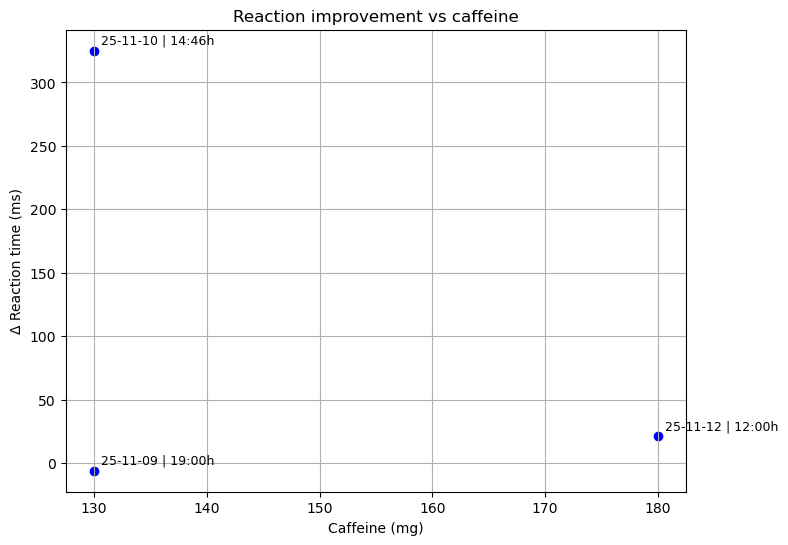

In [90]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(summary["caffeine_mg"], summary["delta_reaction_ms"], color="blue")

for i, row in summary.iterrows():
    date_str = row["coffee_date_time"].strftime("%y-%m-%d")
    time_str = row["coffee_date_time"].strftime("%H:%M")   # real clock format
    
    label = f"{date_str} | {time_str}h"
    
    plt.annotate(
        label,
        (row["caffeine_mg"], row["delta_reaction_ms"]),
        textcoords="offset points",
        xytext=(5,5),
        fontsize=9
    )

plt.xlabel("Caffeine (mg)")
plt.ylabel("Δ Reaction time (ms)")
plt.title("Reaction improvement vs caffeine")
plt.grid(True)
plt.show()

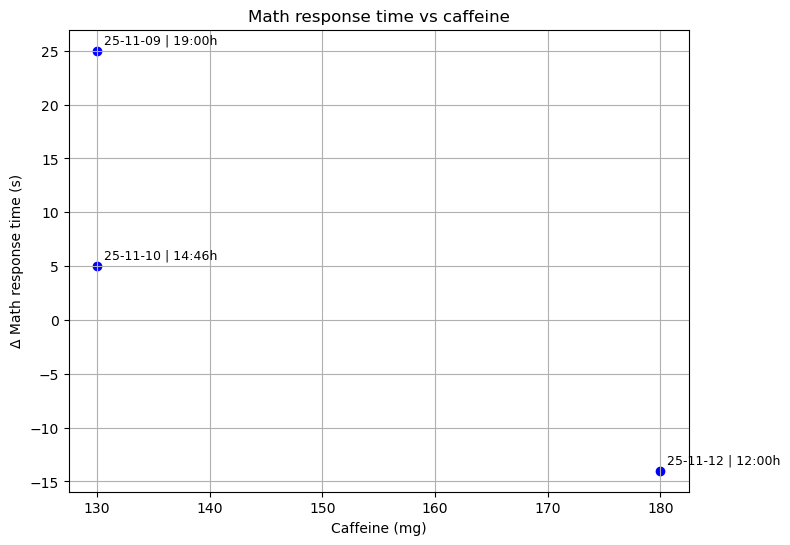

In [91]:
plt.figure(figsize=(8,6))

plt.scatter(summary["caffeine_mg"], summary["delta_math_time_s"], color="blue")

for i, row in summary.iterrows():
    date_str = row["coffee_date_time"].strftime("%y-%m-%d")
    time_str = row["coffee_date_time"].strftime("%H:%M")   # real clock format
    
    label = f"{date_str} | {time_str}h"
    
    plt.annotate(
        label,
        (row["caffeine_mg"], row["delta_math_time_s"]),
        textcoords="offset points",
        xytext=(5,5),
        fontsize=9
    )

plt.xlabel("Caffeine (mg)")
plt.ylabel("Δ Math response time (s)")
plt.title("Math response time vs caffeine")
plt.grid(True)
plt.show()


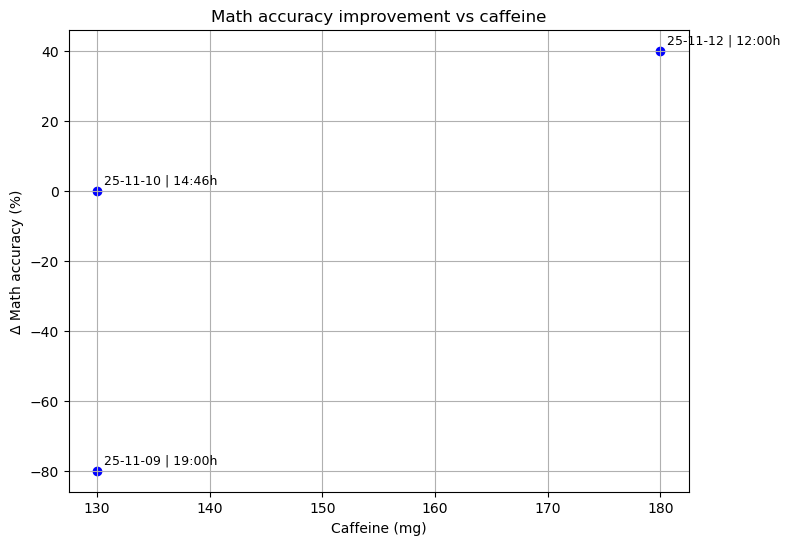

In [92]:
plt.figure(figsize=(8,6))

plt.scatter(summary["caffeine_mg"], summary["delta_math_acc"], color="blue")

for i, row in summary.iterrows():
    date_str = row["coffee_date_time"].strftime("%y-%m-%d")
    time_str = row["coffee_date_time"].strftime("%H:%M")   # real clock format
    
    label = f"{date_str} | {time_str}h"
    
    plt.annotate(
        label,
        (row["caffeine_mg"], row["delta_math_acc"]),
        textcoords="offset points",
        xytext=(5,5),
        fontsize=9
    )

plt.xlabel("Caffeine (mg)")
plt.ylabel("Δ Math accuracy (%)")
plt.title("Math accuracy improvement vs caffeine")
plt.grid(True)
plt.show()


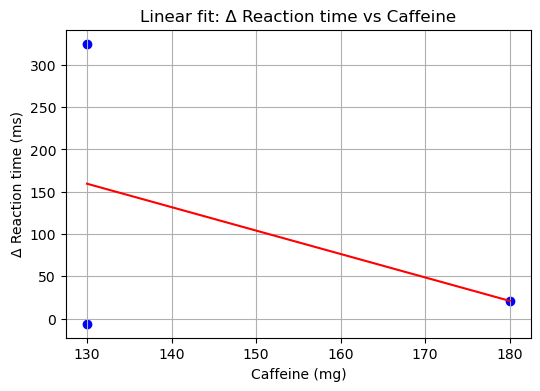

Slope: -2.7699999999999996
Intercept: 519.5999999999999


In [93]:
X = summary[["caffeine_mg"]]
y = summary["delta_reaction_ms"]
model = LinearRegression().fit(X, y)

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_df = pd.DataFrame(x_vals, columns=["caffeine_mg"])
y_pred = model.predict(x_df)

plt.figure(figsize=(6,4))
plt.scatter(summary["caffeine_mg"], summary["delta_reaction_ms"], color="blue")
plt.plot(x_vals, y_pred, color="red")

plt.xlabel("Caffeine (mg)")
plt.ylabel("Δ Reaction time (ms)")
plt.title("Linear fit: Δ Reaction time vs Caffeine")
plt.grid(True)
plt.show()

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

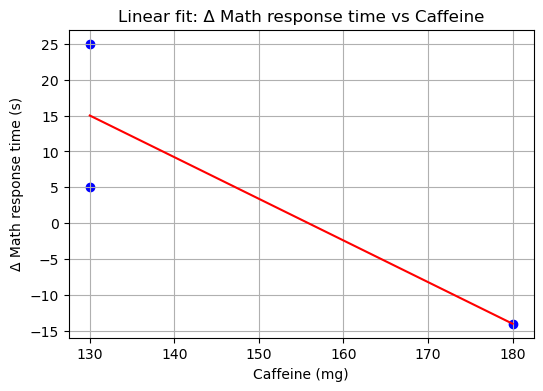

Slope: -2.7699999999999996
Intercept: 519.5999999999999


In [96]:
X = summary[["caffeine_mg"]]
y = summary["delta_math_time_s"]

model_math_time = LinearRegression().fit(X, y)

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_df = pd.DataFrame(x_vals, columns=["caffeine_mg"])
y_pred = model_math_time.predict(x_df)

plt.figure(figsize=(6,4))
plt.scatter(summary["caffeine_mg"], summary["delta_math_time_s"], color="blue")
plt.plot(x_vals, y_pred, color="red")

plt.xlabel("Caffeine (mg)")
plt.ylabel("Δ Math response time (s)")
plt.title("Linear fit: Δ Math response time vs Caffeine")
plt.grid(True)
plt.show()

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

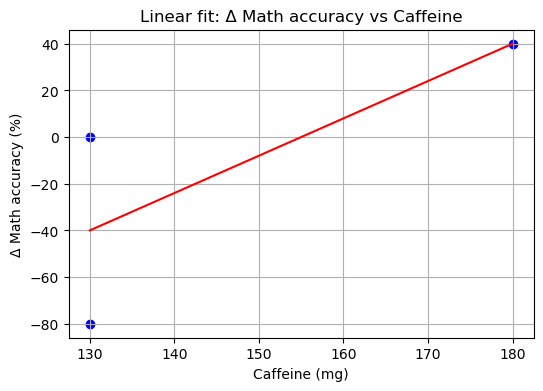

Slope: -2.7699999999999996
Intercept: 519.5999999999999


In [97]:
X = summary[["caffeine_mg"]]
y = summary["delta_math_acc"]

model_math_acc = LinearRegression().fit(X, y)

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_df = pd.DataFrame(x_vals, columns=["caffeine_mg"])
y_pred = model_math_acc.predict(x_df)

plt.figure(figsize=(6,4))
plt.scatter(summary["caffeine_mg"], summary["delta_math_acc"], color="blue")
plt.plot(x_vals, y_pred, color="red")

plt.xlabel("Caffeine (mg)")
plt.ylabel("Δ Math accuracy (%)")
plt.title("Linear fit: Δ Math accuracy vs Caffeine")
plt.grid(True)
plt.show()

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)